# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Rizki
- **Email:** rizki25030@gmail.com
- **ID Dicoding:** mhmmd_rizki

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda per bulan di tiap tahun?
- Pada musim apa jumlah penyewaan sepeda tertinggi?
- Pada jam berapa puncak penyewaan sepeda terjadi dalam sehari?
- Bagaimana pengaruh suhu (temp & atemp), kelembaban (hum), dan kecepatan angin (windspeed) terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada proyek analisis data ini, saya akan menggunakan *Bike Sharing Dataset*. Pada dataset ini terdiri dari 2 file csv, yaitu day.csv dan hour.csv

In [68]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [69]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Berdasarkan sumber dataset ini, didapatkan informasi sebagai berikut:
Dataset ini merupakan generasi baru dari penyewaan sepeda tradisional yang seluruh prosesnya telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari lokasi tertentu dan kembali lagi di lokasi lain.

Pada dataset ini, file hour.csv dan day.csv memiliki attribut/kolom yang sama, namun atribut hr tidak ada pada day.csv. Berikut adalah penjelasan dari masing-masing atribut:
- instant: indeks rekaman
- dteday : tanggal
- season : musim (1:springer, 2:summer, 3:fall, 4:winter)
- yr : tahun (0: 2011, 1:2012)
- mnth : bulan (1 hingga 12)
- hr : jam (0 hingga 23)
- holiday : hari libur atau bukan
- weekday : hari dalam seminggu
- workingday : jika hari tersebut bukan weekend atau hari libur adalah 1, jika tidak adalah 0.
- weathersit :
    - 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
    - 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
    - 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
    - 4: Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut
- temp : Suhu yang dinormalkan dalam Celsius. Nilai-nilai tersebut diturunkan melalui (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hanya dalam skala per jam)
- atemp: Suhu yang dirasakan dalam Celcius. Nilai-nilai tersebut diturunkan melalui (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hanya dalam skala per jam)
- hum: Kelembaban yang dinormalkan. Nilai-nilai tersebut dibagi menjadi 100 (maks)
- windspeed: Kecepatan angin yang dinormalkan. Nilai-nilai tersebut dibagi menjadi 67 (maks)
- casual: jumlah pengguna kasual
- registered: jumlah pengguna terdaftar
- cnt: jumlah total sepeda sewaan termasuk kasual dan terdaftar

### Assessing Data

#### Menilai tabel `day_df`

In [70]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**\
Dari informasi dataset day_df yang dihasilkan diatas, kita dapat mengetahui bahwa banyak data non-null tiap kolom sama. Sehingga dapat kita simpulkan bahwa tidak ada nilai null pada kolom manapun. Selain itu, pada dataset tersebut terdapat salah satu kolom yang tipe datanya masih salah, yaitu kolom dteday. Kolom tersebut harusnya bertipe data datetime, bukan object.

In [71]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**\
Pada hasil pengecekan diatas, tidak ditemukan nilai null pada kolom manapun.

In [72]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**\
Pada hasil pengecekan diatas, tidak ditemukan data duplikat.

In [73]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**\
Dari hasil ringkasan parameter statistik diatas, tidak ditemukan keanehan pada nilai kolom manapun.

#### Menilai tabel `hour_df`

In [74]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**\
Dari informasi dataset hour_df yang dihasilkan diatas, kita dapat mengetahui bahwa banyak data non-null tiap kolom sama. Sehingga dapat kita simpulkan bahwa tidak ada nilai null pada kolom manapun. Selain itu, pada dataset tersebut terdapat salah satu kolom yang tipe datanya masih salah, yaitu kolom dteday. Kolom tersebut harusnya bertipe data datetime, bukan object.

In [75]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**\
Pada hasil pengecekan diatas, tidak ditemukan nilai null pada kolom manapun.

In [76]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**\
Pada hasil pengecekan diatas, tidak ditemukan data duplikat.

In [77]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**\
Dari hasil ringkasan parameter statistik diatas, tidak ditemukan keanehan pada nilai kolom manapun.

### Cleaning Data

#### Membersihkan tabel `day_df`

Mengubah tipe data kolom dteday

In [78]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
Dari hasil informasi diatas, kolom dteday berhasil diubah tipe datanya dari object ke datetime

#### Membersihkan tabel `hour_df`

Mengubah tipe data kolom dteday

In [79]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
Dari hasil informasi diatas, kolom dteday berhasil diubah tipe datanya dari object ke datetime

Export ke folder dashboard

In [80]:
hour_df.to_csv('./dashboard/hour_cleaned.csv', index=False)
day_df.to_csv('./dashboard/day_cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore `day_df`

**Mengambil sample 5 data random**

In [81]:
day_df.tail(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


**Menampilkan ringkasan parameter statistik**

In [82]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Dataset ini memiliki rentang tanggal 1 Januari 2011 sampai dengan 31 Desember 2012
- Tiap baris data merepresentasikan 1 hari
- Dataset memiliki total 713 baris data
- Pada kolom season memiliki value dari 1 - 4 (1:springer, 2:summer, 3:fall, 4:winter)
- Pada kolom yr memiliki 2 value, yaitu 0 dan 1 (0: 2011, 1: 2012)
- Penyewaan sepeda rata-rata dilakukan pada hari rabu (weekday = 3)
- Penyewaan sepeda tertinggi dalam 1 hari didapat 8714 pengguna
- Penyewaan sepeda terendah dalam 1 hari didapat 22 pengguna

**Mengelompokkan data total penyewa berdasarkan tahun dan bulan**

In [83]:
day_grouped_tren = day_df.groupby(['yr', 'mnth'])['cnt'].sum().unstack()
day_grouped_tren.rename(index={0: 2011, 1: 2012}, inplace=True)
day_grouped_tren.style.highlight_max(color="green", axis=1).highlight_min(color="red", axis=1)

mnth,1,2,3,4,5,6,7,8,9,10,11,12
yr,,,,,,,,,,,,
2011,38189,48215,64045,94870,135821,143512,141341,136691,127418,123511,102167,87323
2012,96744,103137,164875,174224,195865,202830,203607,214503,218573,198841,152664,123713


**Insight:**
- Pada tahun 2011, jumlah penyewaan sepeda terendah terjadi pada bulan Januari dengan 38.189 penyewa, sedangkan jumlah tertinggi terjadi pada bulan Juni dengan 143.512 penyewa.
- Pada tahun 2012, jumlah penyewaan terendah juga terjadi pada bulan Januari dengan 96.744 penyewa, sedangkan jumlah tertinggi terjadi pada bulan September dengan 218.573 penyewa.
- Secara umum, terdapat pola peningkatan jumlah penyewaan sepeda pada pertengahan tahun, kemudian mengalami penurunan kembali menjelang akhir tahun di kedua tahun tersebut.

**Mengelompokkan berdasarkan tahun, lalu menghitung beberapa paramter statistik deskriptif seperti max, min, dan sum**

In [84]:
day_grouped_desc_stat = day_df.groupby(by='yr').agg({
    'cnt': ['min', 'max', 'sum'],
    'casual': ['sum'],
    'registered': ['sum'],
})

day_grouped_desc_stat.rename(index={0: 2011, 1: 2012}, inplace=True)

day_grouped_desc_stat.style.highlight_max(props="background-color: green; color: white;", axis=0).highlight_min(props="background-color: red; color: white;", axis=0)

**Insight:**
- Pada tahun 2012, total penyewaan sepeda lebih tinggi dibandingkan tahun 2011, baik dalam kategori penyewa kasual (372.765 vs 247.252) maupun penyewa terdaftar (1.676.811 vs 995.851), sehingga total keseluruhan penyewaan juga meningkat dari 1.243.103 di tahun 2011 menjadi 2.049.576 di tahun 2012.
- Meskipun demikian, jumlah penyewaan harian terendah pada tahun 2012 lebih kecil dibandingkan tahun 2011, dengan angka minimum 22 penyewa dibanding 431 penyewa pada tahun sebelumnya.

**Mengelompokkan data berdasarkan musim, lalu menghitung total penyewa tiap musimnya**

In [85]:
day_grouped_season = day_df.groupby('season').agg({
    'cnt': ['mean', 'sum'],
})
day_grouped_season.rename(index={1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
day_grouped_season.style.highlight_max(color="green").highlight_min(color="red")

**Insight:**
- Jumlah dan rata-rata penyewaan sepeda tertinggi berada pada musim gugur
- Jumlah dan rata-rata penyewaan sepeda terenda berada pada musim semi

**Menampilkan statistik deskriptif untuk kolom temp, atemp, hum, dan windspeed**

In [86]:
# Konversi suhu ke celcius (sebelum normalisasi)
day_df['temp_C'] = day_df['temp'] * (39 - (-8)) + (-8)
day_df['atemp_C'] = day_df['atemp'] * (50 - (-16)) + (-16)

weather_stats = day_df.agg({
    'temp': ['mean', 'median', 'std', 'min', 'max'],
    'temp_C': ['mean', 'median', 'std', 'min', 'max'],
    'atemp': ['mean', 'median', 'std', 'min', 'max'],
    'atemp_C': ['mean', 'median', 'std', 'min', 'max'],
    'hum': ['mean', 'median', 'std', 'min', 'max'],
    'windspeed': ['mean', 'median', 'std', 'min', 'max'],
})

weather_stats

,temp,temp_C,atemp,atemp_C,hum,windspeed
mean,0.495385,15.283085,0.474354,15.307363,0.627894,0.190486
median,0.498333,15.421651,0.486733,16.124378,0.626667,0.180975
std,0.183051,8.603397,0.162961,10.755438,0.142429,0.077498
min,0.059130,-5.220871,0.079070,-10.781406,0.000000,0.022392
max,0.861667,32.498349,0.840896,39.499136,0.972500,0.507463


**Analisis korelasi suhu, kelembapan, dan kecepatan angin terhadap jumlah penyewaan sepeda**

In [87]:
day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr().loc['cnt', ['temp', 'atemp', 'hum', 'windspeed']].to_frame()

,cnt
temp,0.627494
atemp,0.631066
hum,-0.100659
windspeed,-0.234545


**Insight:**
- Suhu (temp & atemp) memiliki korelasi positif yang cukup besar (~0.63) dengan jumlah penyewaan sepeda. Artinya semakin tinggi suhu, semakin banyak sepeda yang disewa.
- Kelembaban (hum) memiliki korelasi negatif yang kecil (-0.10) terhadap penyewaan sepeda. Artinya kelembapan yang semakin tinggi tidak mengurangi jumlah penyewaan sepeda secara signifikan.
- Kecepatan angin (windspeed) memiliki korelasi negatif yang juga cukup kecil (-0.23) terhadap penyewaan sepeda. Artinya kecepatan angin yang semakin tinggi tidak mengurangi jumlah penyewaan sepeda secara signifikan.

**Analisis Pengaruh Suhu, Kelembaban, dan Kecepatan Angin terhadap Jumlah Penyewaan Sepeda dengan cara klasterisasi dengan metode binning**

In [88]:
# Definisikan interval kategori untuk suhu, kelembaban, dan kecepatan angin
bins_temp = np.linspace(day_df['temp'].min(), day_df['temp'].max(), 6)  # 5 kategori suhu
bins_atemp = np.linspace(day_df['atemp'].min(), day_df['atemp'].max(), 6)  # 5 kategori atemp
bins_hum = np.linspace(day_df['hum'].min(), day_df['hum'].max(), 6)  # 5 kategori kelembaban
bins_wind = np.linspace(day_df['windspeed'].min(), day_df['windspeed'].max(), 6)  # 5 kategori angin

# Buat label kategori
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Konversi nilai menjadi kategori (binning)
day_df['temp_group'] = pd.cut(day_df['temp'], bins=bins_temp, labels=labels)
day_df['atemp_group'] = pd.cut(day_df['atemp'], bins=bins_atemp, labels=labels)
day_df['hum_group'] = pd.cut(day_df['hum'], bins=bins_hum, labels=labels)
day_df['wind_group'] = pd.cut(day_df['windspeed'], bins=bins_wind, labels=labels)

# Group by berdasarkan kategori dan hitung rata-rata penyewaan sepeda
temp_effect = day_df.groupby('temp_group')['cnt'].mean()
atemp_effect = day_df.groupby('atemp_group')['cnt'].mean()
hum_effect = day_df.groupby('hum_group')['cnt'].mean()
wind_effect = day_df.groupby('wind_group')['cnt'].mean()

# Gabungkan hasil dalam satu DataFrame
effect_df = pd.DataFrame({
    'Temperature (temp)': temp_effect,
    'Feeling Temperature (atemp)': atemp_effect,
    'Humidity (hum)': hum_effect,
    'Wind Speed (windspeed)': wind_effect
})

# Menampilkan tabel dengan styling
effect_df.style.highlight_max(axis=0, props="background-color: green; color: white;") \
          .highlight_min(axis=0, props="background-color: red; color: white;")


C:\Users\rizki\AppData\Local\Temp\ipykernel_11796\1060486543.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_effect = day_df.groupby('temp_group')['cnt'].mean()
C:\Users\rizki\AppData\Local\Temp\ipykernel_11796\1060486543.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  atemp_effect = day_df.groupby('atemp_group')['cnt'].mean()
C:\Users\rizki\AppData\Local\Temp\ipykernel_11796\1060486543.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

,Temperature (temp),Feeling Temperature (atemp),Humidity (hum),Wind Speed (windspeed)
Very Low,1585.214286,1620.568182,1635.000000,5051.443548
Low,3152.015464,3190.091837,4539.380952,4678.582418
Medium,4585.797688,4684.586387,4570.141791,4188.526882
High,5674.958763,5766.897436,4805.537538,3172.306122
Very High,5664.118110,5398.846154,3458.429907,3400.285714


1. Pengaruh Suhu (temp dan atemp) terhadap Penyewaan Sepeda:
    - Jumlah penyewaan meningkat seiring dengan kenaikan suhu dari kategori Very Low hingga High.
    - Namun, pada kategori Very High jumlah penyewaan sedikit menurun dibandingkan High.

2. Pengaruh Kelembaban terhadap Penyewaan:
    - Penyewaan cenderung meningkat pada tingkat kelembaban yang rendah hingga tinggi.
    - Namun, pada kategori Very High jumlah penyewaan sedikit menurun dibandingkan High

3. Pengaruh Kecepatan Angin terhadap Penyewaan:
    - Penyewaan sepeda tertinggi berada pada kecepatan angin yang sangat rendah (Very Low).
    - Seiring peningkatan kecepatan angin, jumlah penyewaan menurun secara bertahap.

### Explore `hour_df`

**Mengelompokkan total penyewa sepeda per jam**

In [89]:
hour_grouped = hour_df.groupby('hr').agg({
    'cnt': ['mean'],
    'casual': ['mean'],
    'registered': ['mean'],
})
hour_grouped.style.highlight_max(color="green").highlight_min(color="red")

,cnt,casual,registered
,mean,mean,mean
hr,,,
0,53.898072,10.158402,43.739669
1,33.375691,6.504144,26.871547
2,22.869930,4.772028,18.097902
3,11.727403,2.715925,9.011478
4,6.352941,1.253945,5.098996
5,19.889819,1.411437,18.478382
6,76.044138,4.161379,71.882759
7,212.064649,11.055021,201.009629


**Insight:**
- Penyewaan sepeda secara keseluruhan mencapai puncaknya pada jam 17:00, dengan rata-rata 461 penyewa.
- Penyewaan sepeda oleh pengguna terdaftar juga mencapai puncaknya pada jam 17:00, dengan rata-rata 387 penyewa.
- Namun, penyewaan sepeda oleh pengguna kasual mencapai puncaknya pada jam 14:00m dengan rata-rata 75 penyewa.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda per bulan di tiap tahun?

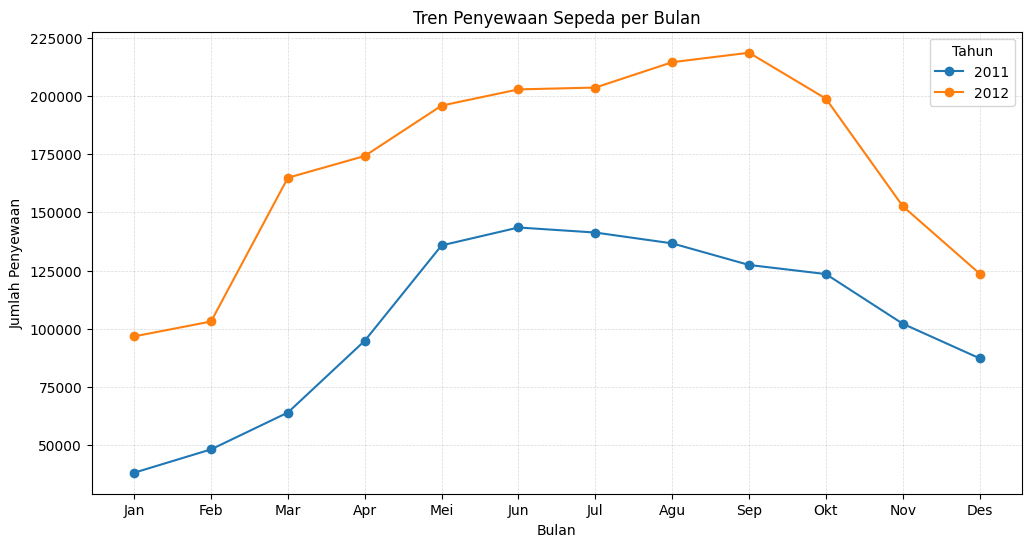

In [90]:
# Mengelompokkan data berdasarkan tahun dan bulan
day_grouped_tren = day_df.groupby(['yr', 'mnth'])['cnt'].sum().unstack(level=0)

# Mengubah label tahun dari 0/1 menjadi 2011/2012 (dan seterusnya jika ada lebih banyak tahun)
year_labels = {i: 2011 + i for i in day_grouped_tren.columns}
day_grouped_tren.rename(columns=year_labels, inplace=True)

# Plot tren penyewaan sepeda per bulan untuk setiap tahun
plt.figure(figsize=(12, 6))
for year in day_grouped_tren.columns:
    plt.plot(day_grouped_tren.index, day_grouped_tren[year], marker='o', linestyle='-', label=str(year))

# Judul dan Label
plt.title('Tren Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'
])
plt.legend(title="Tahun")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)  # Abu-abu terang dengan transparansi 30%

# Tampilkan plot
plt.show()


**Insight:**
- Tren penyewaan sepeda pada tahun 2011 dan 2012 menunjukkan pola yang mirip, dengan peningkatan di pertengahan tahun dan penurunan di akhir tahun.
- Namun, jumlah penyewaan sepeda di tahun 2012 lebih tinggi setiap bulannya dibandingkan dengan tahun 2011.

### Pertanyaan 2: Pada musim apa jumlah penyewaan sepeda tertinggi?

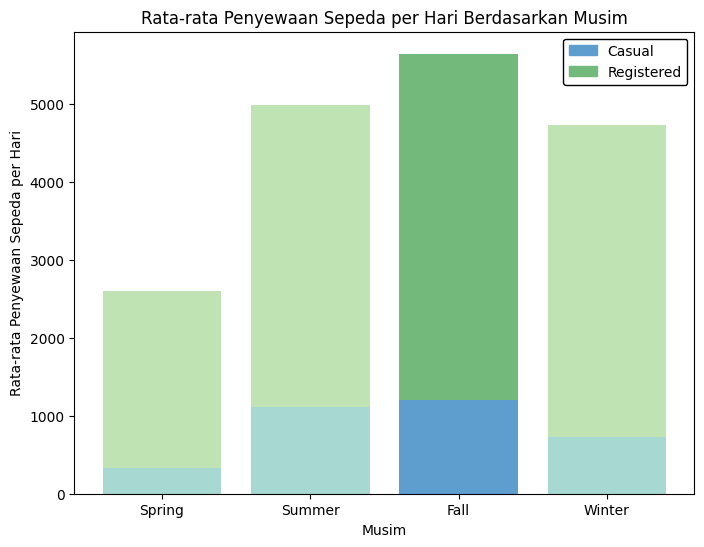

In [91]:
# Mengelompokkan data berdasarkan musim
day_grouped_season = day_df.groupby('season').agg({
    'casual': ['mean'],
    'registered': ['mean'],
})

# Mengubah indeks angka menjadi nama musim
day_grouped_season.rename(index={1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)

# Unstacking agar lebih mudah diakses
casual = day_grouped_season['casual']['mean']
registered = day_grouped_season['registered']['mean']
total = casual + registered  # Total penyewaan per musim

# Menentukan musim dengan total penyewaan terbesar
max_season = total.idxmax()

# Warna utama untuk musim terbesar
color_casual_main = '#5e9ecf'
color_registered_main = '#73b97c'

# Warna pudar untuk musim lainnya
color_casual_fade = '#a7d8d2'
color_registered_fade = '#bfe3b2'

# Menentukan warna setiap musim
colors_casual = [color_casual_main if season == max_season else color_casual_fade for season in total.index]
colors_registered = [color_registered_main if season == max_season else color_registered_fade for season in total.index]

# Plot
plt.figure(figsize=(8, 6))
seasons = total.index
x = np.arange(len(seasons))

plt.bar(x, casual, label='Casual', color=colors_casual)
plt.bar(x, registered, bottom=casual, label='Registered', color=colors_registered)  # Ditumpuk di atas casual

# Label dan Judul
plt.xticks(x, seasons)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda per Hari')
plt.title('Rata-rata Penyewaan Sepeda per Hari Berdasarkan Musim')
plt.legend(
    [
        plt.Rectangle((0, 0), 1, 1, color=color_casual_main),
        plt.Rectangle((0, 0), 1, 1, color=color_registered_main)
    ],
    ['Casual', 'Registered'],
    loc='upper right',
    fontsize=10,
    facecolor='white',
    framealpha=1,
    edgecolor='black'
)

# Tampilkan plot
plt.show()


**Insight:**
- Jumlah penyewaan sepeda tertinggi terjadi pada musim gugur, baik untuk penyewa kasual maupun terdaftar.

### Pertanyaan 3: Pada jam berapa puncak penyewaan sepeda terjadi dalam sehari?

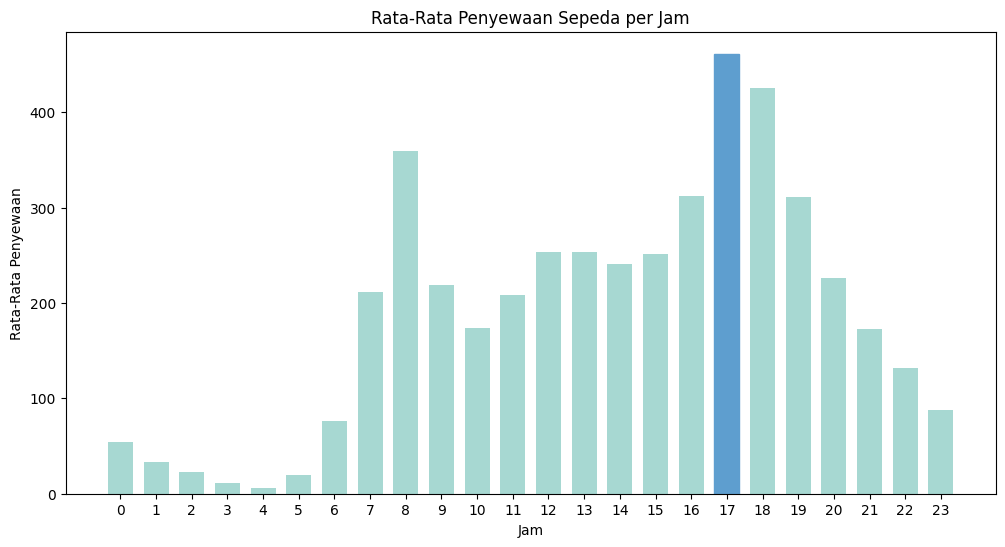

In [92]:
hour_grouped = hour_df.groupby('hr').cnt.mean()

plt.figure(figsize=(12, 6))
max_hour = hour_grouped.idxmax()
bars = plt.bar(hour_grouped.index, hour_grouped.values, color='#a7d8d2', width=0.7)
bars[max_hour].set_color('#5e9ecf')
plt.title("Rata-Rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-Rata Penyewaan")

# Menampilkan semua label di sumbu X
plt.xticks(hour_grouped.index)

plt.show()


**Insight:**
- Rata-rata penyewaan sepeda tertinggi terjadi pada pukul 17:00.

### Pertanyaan 4: Bagaimana pengaruh suhu (temp & atemp), kelembaban (hum), dan kecepatan angin (windspeed) terhadap jumlah penyewaan sepeda?

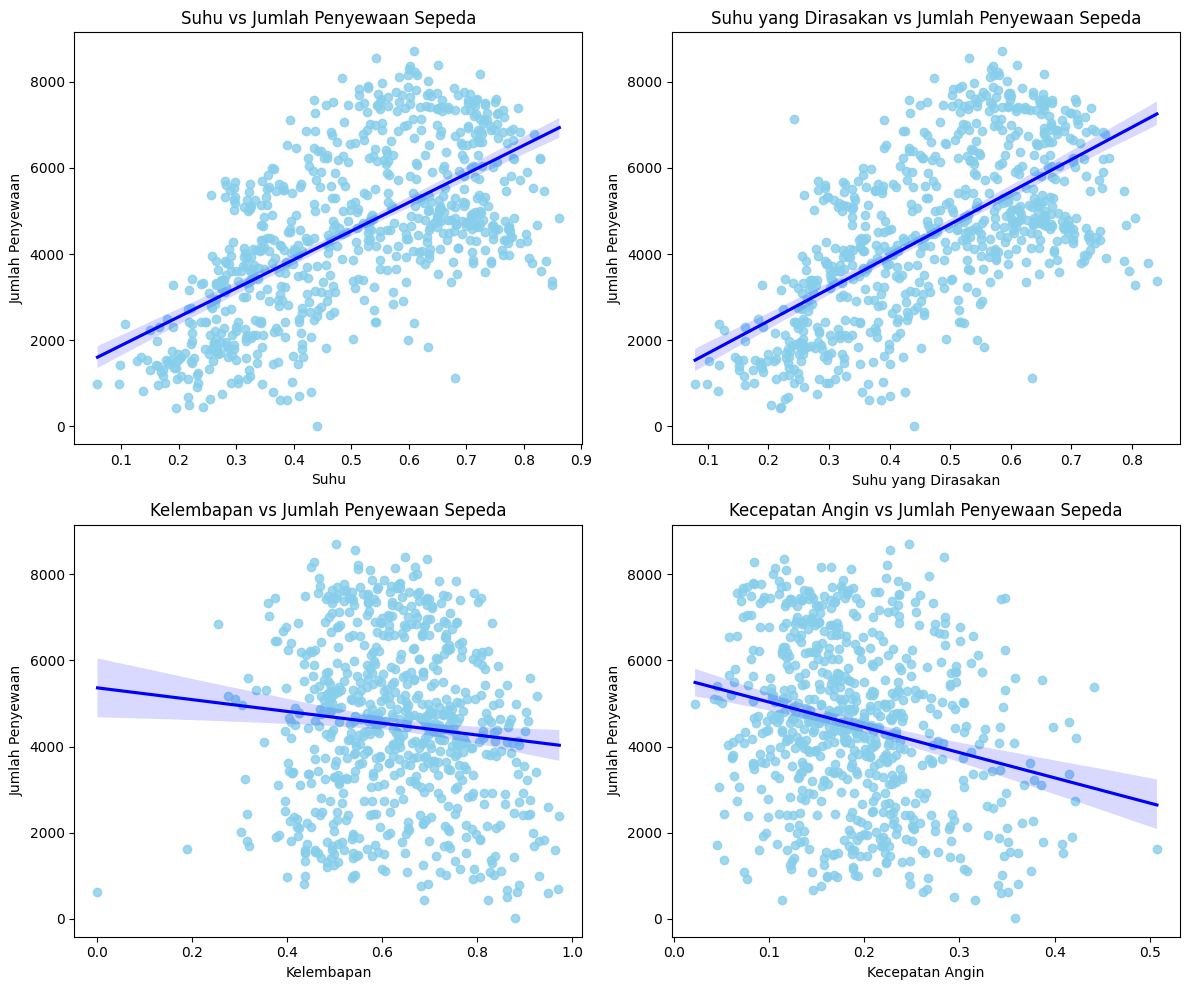

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.regplot(ax=axes[0, 0], x=day_df['temp'], y=day_df['cnt'], scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})
axes[0, 0].set_title("Suhu vs Jumlah Penyewaan Sepeda")
axes[0, 0].set_xlabel("Suhu")
axes[0, 0].set_ylabel("Jumlah Penyewaan")

sns.regplot(ax=axes[0, 1], x=day_df['atemp'], y=day_df['cnt'], scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})
axes[0, 1].set_title("Suhu yang Dirasakan vs Jumlah Penyewaan Sepeda")
axes[0, 1].set_xlabel("Suhu yang Dirasakan")
axes[0, 1].set_ylabel("Jumlah Penyewaan")

sns.regplot(ax=axes[1, 0], x=day_df['hum'], y=day_df['cnt'], scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})
axes[1, 0].set_title("Kelembapan vs Jumlah Penyewaan Sepeda")
axes[1, 0].set_xlabel("Kelembapan")
axes[1, 0].set_ylabel("Jumlah Penyewaan")

sns.regplot(ax=axes[1, 1], x=day_df['windspeed'], y=day_df['cnt'], scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})
axes[1, 1].set_title("Kecepatan Angin vs Jumlah Penyewaan Sepeda")
axes[1, 1].set_xlabel("Kecepatan Angin")
axes[1, 1].set_ylabel("Jumlah Penyewaan")

plt.tight_layout()
plt.show()


**Insight:**
- Suhu (temp & atemp) Memiliki Hubungan yang Kuat dengan Penyewaan Sepeda
    - Garis regresi memiliki kemiringan positif dengan sudut kemiringan yang cukup besar, yang menunjukkan bahwa kenaikan suhu dapat meningkatkan jumlah penyewaan secara signifikan.
    - Pita di sekitar garis regresi cukup sempit/kecil, menandakan bahwa hubungan suhu benar-benar berpengaruh terhadap penyewaan sepeda secara konsisten.

- Kelembaban (hum) Memiliki Hubungan Lemah dengan Penyewaan Sepeda
    - Garis regresi memiliki kemiringan negatif dengan sudut kemiringan kecil, yang menunjukkan bahwa kenaikan kelembapan tidak menurunkan penyewaan sepeda secara signifikan.
    - Pita di sekitar garis regresi cukup lebar, menandakan bahwa ada banyak variasi dalam data, sehingga hubungan ini kurang dapat diprediksi dengan tingkat kepercayaan tinggi.

- Kecepatan Angin (windspeed) Memiliki Hubungan Lemah dengan Penyewaan Sepeda
    - Garis regresi memiliki kemiringan negatif dengan sudut kemiringan kecil, yang menunjukkan bahwa kenaikan kecepatan angin tidak menurunkan penyewaan sepeda secara signifikan. Namun lebih berpengaruh dibandingkan kelembapan.
    - Pita di sekitar garis regresi cukup lebar, menandakan bahwa ada banyak variasi dalam data, sehingga hubungan ini kurang dapat diprediksi dengan tingkat kepercayaan tinggi.

## Analisis Lanjutan (Opsional)

Analisis lanjutan pengaruh suhu (temp & atemp), kelembaban (hum), dan kecepatan angin (windspeed) terhadap jumlah penyewaan sepeda

In [94]:
# Definisikan interval kategori untuk suhu, kelembaban, dan kecepatan angin
bins_temp = np.linspace(day_df['temp'].min(), day_df['temp'].max(), 6)  # 5 kategori suhu
bins_atemp = np.linspace(day_df['atemp'].min(), day_df['atemp'].max(), 6)  # 5 kategori atemp
bins_hum = np.linspace(day_df['hum'].min(), day_df['hum'].max(), 6)  # 5 kategori kelembaban
bins_wind = np.linspace(day_df['windspeed'].min(), day_df['windspeed'].max(), 6)  # 5 kategori angin

# Buat label kategori
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Konversi nilai menjadi kategori (binning)
day_df['temp_group'] = pd.cut(day_df['temp'], bins=bins_temp, labels=labels)
day_df['atemp_group'] = pd.cut(day_df['atemp'], bins=bins_atemp, labels=labels)
day_df['hum_group'] = pd.cut(day_df['hum'], bins=bins_hum, labels=labels)
day_df['wind_group'] = pd.cut(day_df['windspeed'], bins=bins_wind, labels=labels)

# Group by berdasarkan kategori dan hitung rata-rata penyewaan sepeda
temp_effect = day_df.groupby('temp_group')['cnt'].mean()
atemp_effect = day_df.groupby('atemp_group')['cnt'].mean()
hum_effect = day_df.groupby('hum_group')['cnt'].mean()
wind_effect = day_df.groupby('wind_group')['cnt'].mean()

# Gabungkan hasil dalam satu DataFrame
effect_df = pd.DataFrame({
    'Temperature (temp)': temp_effect,
    'Feeling Temperature (atemp)': atemp_effect,
    'Humidity (hum)': hum_effect,
    'Wind Speed (windspeed)': wind_effect
})


C:\Users\rizki\AppData\Local\Temp\ipykernel_11796\1812936836.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_effect = day_df.groupby('temp_group')['cnt'].mean()
C:\Users\rizki\AppData\Local\Temp\ipykernel_11796\1812936836.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  atemp_effect = day_df.groupby('atemp_group')['cnt'].mean()
C:\Users\rizki\AppData\Local\Temp\ipykernel_11796\1812936836.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

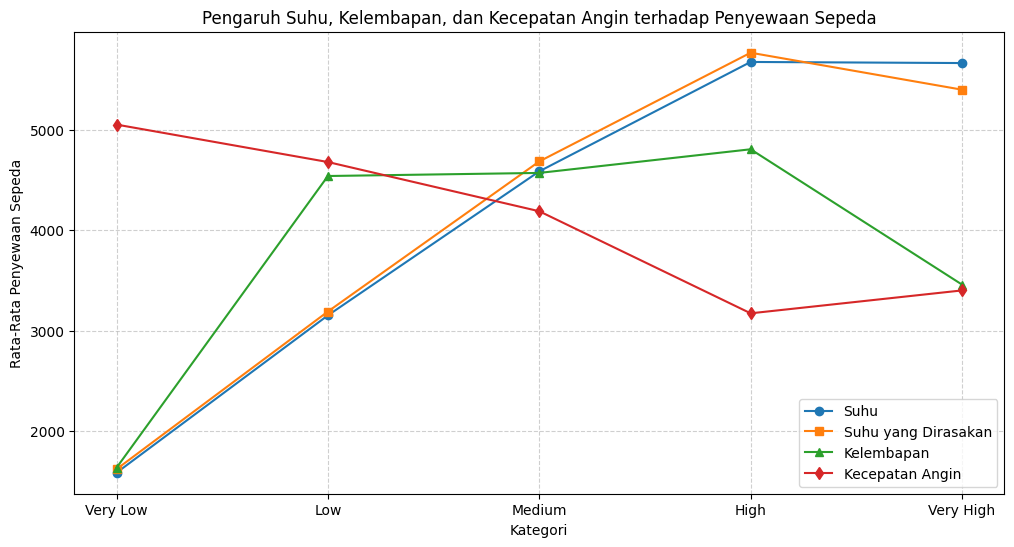

In [95]:
# Plot line chart
plt.figure(figsize=(12, 6))

# Plot setiap kategori dengan garis berbeda
plt.plot(effect_df.index, effect_df['Temperature (temp)'], marker='o', label='Suhu', color='#1f77b4')
plt.plot(effect_df.index, effect_df['Feeling Temperature (atemp)'], marker='s', label='Suhu yang Dirasakan', color='#ff7f0e')
plt.plot(effect_df.index, effect_df['Humidity (hum)'], marker='^', label='Kelembapan', color='#2ca02c')
plt.plot(effect_df.index, effect_df['Wind Speed (windspeed)'], marker='d', label='Kecepatan Angin', color='#d62728')

# Tambahkan label dan judul
plt.xlabel("Kategori")
plt.ylabel("Rata-Rata Penyewaan Sepeda")
plt.title("Pengaruh Suhu, Kelembapan, dan Kecepatan Angin terhadap Penyewaan Sepeda")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Tampilkan plot
plt.show()



**Insight:**
- Pengaruh Suhu dan Suhu yang Dirasakan
    - Berdasarkan line chart diatas, dapat dilihat bahwa rata-rata penyewaan sepeda **bertambah secara signifikan** ketika suhu naik sampai ke kategori *High*. Hal ini sesuai dengan scatter plot sebelumnya, dimana garis regresi positif dengan tingkat kepercayaan yang tinggi.
    - Dapat disimpulkan juga bahwa, rata-rata orang nyaman bersepeda pada suhu *High*.
- Pengaruh Kelembapan
    - Berdasarkan line chart diatas, rata-rata penyewaan sepeda **bertambah cukup signifikan** dari kategori *Very Low* ke *Low*. Namun, pada kategori selanjutnya, rata-rata penyewaan sepeda **tidak berubah secara signifikan**, bahkan turun. Hal ini sesuai dengan scatter plot sebelumnya, dimana garis regresi negatif dengan kemiringan yang kecil dan tingkat kepercayaan yang rendah.
    - Dapat disimpulkan juga bahwa, rata-rata orang nyaman bersepeda pada kelembapan *Low* sampai *High*.
- Pengaruh Kecepatan Angin
    - Berdasarkan line chart diatas, dapat dilihat bahwa rata-rata penyewaan sepeda berkurang ketika kecepatan angin naik, namun tidak terlalu signifikan seperti pengaruh suhu. Hal ini sesuai dengan scatter plot sebelumnya, dimana garis regresi negatif dengan kemiringan yang lebih besar dari kelembapan.
    - Dapat disimpulkan juga bahwa, rata-rata orang nyaman bersepeda pada kecepatan angin dengan kategori *Low*.

## Conclusion

- Kesimpulan pertanyaan 1: Bagaimana tren penyewaan sepeda per bulan di tiap tahun?\
    Tren penyewaan sepeda pada tahun 2011 dan 2012 menunjukkan pola yang mirip, dengan peningkatan di pertengahan tahun dan penurunan di akhir tahun. Selain itu, jumlah penyewaan sepeda di tahun 2012 lebih tinggi setiap bulannya dibandingkan dengan tahun 2011.

- Kesimpulan pertanyaan 2: Pada musim apa jumlah penyewaan sepeda tertinggi?\
    Jumlah penyewaan sepeda tertinggi terjadi pada musim gugur, baik untuk penyewa kasual maupun terdaftar.

- Kesimpulan pertanyaan 3: Pada jam berapa puncak penyewaan sepeda terjadi dalam sehari?\
    Rata-rata penyewaan sepeda tertinggi terjadi pada pukul 17:00.

- Kesimpulan pertanyaan 4: Bagaimana pengaruh suhu (temp & atemp), kelembaban (hum), dan kecepatan angin (windspeed) terhadap jumlah penyewaan sepeda?\
    Suhu berpengaruh secara signifikan terhadap jumlah penyewaan sepeda secara positif. Sedangkan kelembapan dan kecepatan angin tidak berpengaruh secara signifikan terhadap jumlah penyewaan sepeda